# Lab 3 solution (Lab 4 solution at the end of this notebook)

In the lecture we will have covered the different types of machine learning and crucial steps in a ML pipeline including ingestion of the data, preparation of the data for ML models and segregating it.

In this lab you will:
- Follow the first four ML pipeline steps of: Problem Definition, Data Ingestion, Data Preparation, Data Segratation of a dataset
- Explore various feature extraction and engineering techniques to ready data for a model
- Segregate (split) the data 

After this lab you will:
 - Understand how to work with new data in Python and ready it to make it suitable for a ML model

Throughout this lab you will see various `#TODO` statements in code cells or the word **TASK** in Markdown cells. You will need to write the correct code for those tasks, as it is not provided. 

# Machine Learning Pipeline
As described in the lecture, and following the book: *Artificial Intelligence with Python, Artasanchez, A., Joshi, P. (2020)* we have 8 important steps in a cyclical ML Pipeline:
1) Problem Definition
2) Data Ingestion
3) Data Preparation
4) Data Segregation
5) Model Training
6) Model Evaluation
7) Model Deployment
8) Performance Monitoring

This lab will focus on the **first four**. 

# 1. Problem Definition
Defining the problem is the first step in an ML pipeline. Without an actual problem, you would have no reason to set your ML pipeline up. 

In this lab, we will use [Kaggle](https://www.kaggle.com/competitions/titanic/overview) as a source and work with the Titanic Disaster Dataset. For us, therefore the problem definition can be extracted from this source as:

>The sinking of the Titanic is one of the most infamous shipwrecks in history.
>
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>
>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
>
>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

To narrow it down further, as we will only work with the first four steps in our ML pipeline we could write the problem formulation as: **Obtaining and preparing the Titanic Disaster Dataset so that it can be used in ML model training to determine if passengers were likely to survive given their data**.

### Module Imports
Before working with the data one needs to import all relevant Python modules. It is good practice to do that in a single Jupyter Notebook cell at the top of your code, rather than spread throughout the whole file.

**TASK**: Modify your conda environment so that the modules below all have been installed. 

In [4]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Data Ingestion
Data can be loaded from different sources, or you will need to collect new data based on your problem statement. In this case it should be relatively simple as in competitions such as on Kaggle, you have the data mostly available,  ready to be downloaded. 
Other times you may need to build connections to databases or parse a lot of files such as images or logs from a filesystem. 

In our case we can download the *train* data from Kaggle via this [link](https://www.kaggle.com/competitions/titanic/data). If you do not have a kaggle account you can also download it from [GitHub](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv). 

**TASK**: Download the .csv file and save it in the same directory as this notebook as *train.csv* Then use the code cell below and utilize the pandas library to load the csv file into a variable called *df*. Then print out the top 10 lines of the dataframe so that you can have a look at the data. 

In [5]:
#TODO 
df = pd.read_csv("./train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Now have a look at the data. What you should try to figure out now is what the data is about and what the type of data is. You could use the [data source](https://www.kaggle.com/competitions/titanic/data). to see if they have a data dictionary which could help you decipher the meaning of each cell, but in other applications, you may need to create your own. 

**TASK**: Use the following markdown cell to note down the columns that contain:

- The target variable
- Categorical data, split by whether they are *ordinal* or not
- Numerical data, split by whether they are *discrete* or *continuous*

### Target Variable
- Survived

### Categorical data
- Survived
- PClass (ordinal)
- Sex
- Embarked

### Numerical data
- PassengerId (discrete)
- Age (continous)
- Fare (continous)
- SibSp (discrete)


# 3 Data Preparation

Usually, this step goes hand in hand with the EDA. However, as EDA is not a focus of this module let us assume the following assumptions that have been determined by the EDA (some of them have been changed for this lab and may not directly correlate with the actual data though):
- A majority of survivors were female
- The *Name* column has further information including titles
- The *PassengerID*, *Ticket* and *Cabin* have low correlations with other variables and can be removed
- Missing values are in the *Age*, *Cabin* and *Embarked* column
- The *Pclass* variable has a high correlation with the *Age* variable
- The *Fare* is higher, the higher the *Pclass*'s
- The *Fare* has some outliers with some extreme pricey tickets
- *SibSp* and *Parch* do not have a high correlation with other variables but could be combined to obtain a family size
- Passengers in cabins in the *pclass* had higher survival rates
- There are only a few older passengers based on the *Age* variable


In this case, based on the EDA, we want to perform the following:
1. Remove unnecessary columns
2. Handle missing values
3. Engineer features that utilize title within *name*
4. Handle the *Age* variable 
5. Handle the *Fare* variable
6. Handle the *SibSp* and *Parch* values to create a family size. 
7. Encode the data

This is not an exclusive list of steps but shows the most common steps in this stage of an ML pipeline. Often there are more variables and further insights with an EDA which require more feature extraction and engineering as well as data preparation steps. 



### 3.1 Remove unnecessary columns
Based on the information above, the columns *ticket* and *cabin* can be removed. We want to retain PassengerId for later use for now. 

**Task**: Drop those two columns from the dataframe.

In [6]:
#TODO drop the columns that are not needed: ticket and cabin
df = df.drop(columns=['Ticket', 'Cabin'])
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


### 3.2 Handle missing values
Based on the information above, missing values are in the *Age*, *Cabin* and *Embarked* columns. As we have dropped the *Cabin* column, only the *Age* and *Embarked* are relevant now. 

The majority of passengers embarked from the port in Cherbourg ("C"). 

**Task**: Replace the missing values for the *Embarked* Column with "C"

In [7]:
#TODO:Replace the missing values for the Embarked Column with "C"
df['Embarked'] = df['Embarked'].fillna('C')


The EDA has shown that the *Pclass* variabe has a high correlation with the *Age* variable. 

Therefore, simply replacing all empty values in this column with the median would not be sensible. First, because we have a few older people who could skew the mean and second, because we have the high correlation as described. It would be better to fill the age values based on the mean age in the *Pclass*. Additionally it would also be beneficial to group those by *Sex* as more females have survived than males. 

**TASK**: 
1. Find the median age for each *Sex* per *Pclass* 
2. Fill the missing values that correlate a specific *Sex* and *Pclass* with the values obtained in step 1.

Tip: Use [df.groupby](https://www.w3schools.com/python/pandas/ref_df_groupby.asp), [df.fillna](https://www.w3schools.com/python/pandas/ref_df_fillna.asp) and [df.transform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) for this. Note: This is the most difficult task in this lab.

In [8]:
#TODO: Find all values where the Age is NaN for checking whether your code is correct
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


In [9]:
#TODO: Find the median age, per *Pclass* and per *Sex* and fill the missing values that correlate a specific *Pclass* and *Sex* with the values obtained

# df grouped by Sex and Pclass and median computed
df_sex_pclass = df.groupby(by=['Sex', 'Pclass']).median(numeric_only=True)
print(df_sex_pclass)

# applied the median to the missing values
df['Age'] = df['Age'].fillna(df.groupby(by=['Sex', 'Pclass'])['Age'].transform('median'))




               PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500


### 3.3 Engineer features that utilize a title within *name*
The EDA has found that there are titles included in the names after the first comma, with examples being:
- Braund, Mr. Owen Harris
- Futrelle, Mrs. Jacques Heath (Lily May Peel)

We want to extract this title and and out all the unique values of titles. It is also assumed that titles can be based on the Sex. 

**TASK**
1. Run the code below and try to understand how the titles have been extracted. 
2. Create a new column *Title* using the query below
3. Replace all occurences of the "Ms" and "Mlle" title with "Miss" and "Mme" with "Mrs".
4. Replace all occurences of titles other than "Mr", "Mrs", "Miss" with "Other".
5. Drop all the *Name* values as they are not necessary


In [10]:
print(df['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0].unique())

#TODO: create a new column called title in the df and use the query above
df["Title"] = df['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

#TODO: Replace all occurences of titles other than "Mr", "Mrs", "Miss" with "Other"
df["Title"] = df["Title"].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'], 'Other')

#TODO: Drop all the *Name* values as they are not necessary
df = df.drop(columns=['Name'])

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'th' 'Jonkheer']


### 3.4 Handle the *Age* variable 
The EDA has shown that there are only a few older passengers based on the *Age* variable.
One of the techniques we could use to handle this continuous variable is to use scaling. Here we could simply scale the *Age* values to a range of between 0 and 1. 

However, children were likely given a higher priority on lifeboats, therefore creating age groups is more appropriate rather than scaling. Additionally, scaling may also produce incorrect results as there are only a few people of higher age. 

A technique that is used to group data is Binning. In Python Machine Learning by Example, Liu, Y., (2020), Chapter 1, it is described as:
> Sometimes, it's useful to separate feature values into several bins. For example,
we may only be interested in whether it rained on a particular day. Given the
precipitation values, we can binarize the values, so that we get a true value if the
precipitation value isn't zero, and a false value otherwise. We can also use statistics
to divide values into high, low, and medium bins. In marketing, we often care more
about the age group, such as 18 to 24, than a specific age, such as 23.
>
> The binning process inevitably leads to loss of information. However, depending on
your goals, this may not be an issue, and actually reduces the chance of overfitting.
Certainly, there will be improvements in speed and reduction of memory or storage
requirements and redundancy.

In our case we want to use the *Age* column and create an ordinal value out of this with three bins:
- Low Age 0<=18Years
- Medium Age 18<=65Years
- High Age 65< Years

**Task**: Replace the values in the *Age* column based on the abovenamed groups. Use the following ordinal values:
    - Low Age : 1
    - Medium Age : 2
    - High Age: 3
    
Tip: Use [df.loc](https://www.w3resource.com/pandas/dataframe/dataframe-loc.php) for this.

In [11]:
#TODO: Replace the values in the *Age* column based on the abovenamed groups
df.loc[df['Age'] <= 18, 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 65), 'Age'] = 2
df.loc[df['Age'] > 65, 'Age'] = 3
df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,2.0,1,0,7.2500,S,Mr
1,2,1,1,female,2.0,1,0,71.2833,C,Mrs
2,3,1,3,female,2.0,0,0,7.9250,S,Miss
3,4,1,1,female,2.0,1,0,53.1000,S,Mrs
4,5,0,3,male,2.0,0,0,8.0500,S,Mr
5,6,0,3,male,2.0,0,0,8.4583,Q,Mr
6,7,0,1,male,2.0,0,0,51.8625,S,Mr
7,8,0,3,male,1.0,3,1,21.0750,S,Master
8,9,1,3,female,2.0,0,2,11.1333,S,Mrs
9,10,1,2,female,1.0,1,0,30.0708,C,Mrs


### 3.5 Handle the *Fare* variable 
The *Fare* has some of the same properties as age with some pricy tickets and a lot of them being 'cheap'. 

**TASK**: Similar to the *Age* variable, create three bins for ticket prices. You can use the plot below as guidance or use other EDA techniques to examine the *fare* values and then decide on the ranges for each group.

c:\ProgramData\Anaconda3\envs\lab_environment_dl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


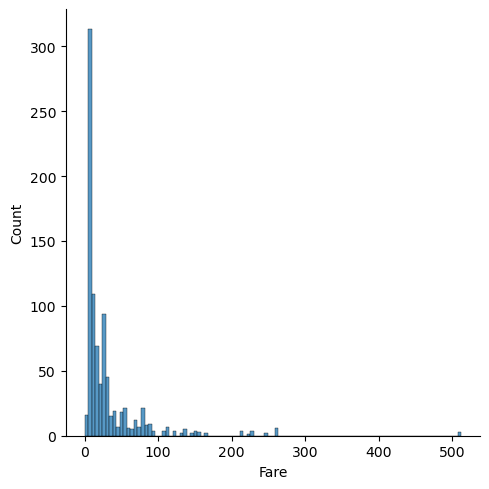

In [12]:
# Show the distribution of data in the fare
sns.displot(df['Fare'])

#TODO: Replace the values in the *Fare* column based on three groups
df.loc[df['Fare'] <= 10, 'Fare'] = 1
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 100), 'Fare'] = 2
df.loc[df['Fare'] > 100, 'Fare'] = 3

### 3.6 Handle the *SibSp* and *Parch* values to create a family size

The *SibSp* and *Parch* variables tell us something about the size of the family of a specific passenger aboard. However, as those values are recorded separately, we would need to combine them first. 
Use your skills obtained in the previous cells to do this.

**TASK**:
1) Create a *FamilySize* column in the dataframe by adding the *SibSp* and *Parch* variables together. (Do not forget to add +1 for the actual passenger)
2) Drop the *SibSp* and *Parch* columns
3) Create three groups via binning again for passengers travelling in a Family of Size: 
- 1 Person: Alone: Group 1
- 2-4 Persons: Small Family: Group 2
- 4< Persons, Lage Family: Group 3 

In [13]:
#TODO: Create a *FamilySize* column in the dataframe by adding the *SibSp* and *Parch* variables together. (Do not forget to add +1 for the actual passenger)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#TODO: Drop the *SibSp* and *Parch* columns
df = df.drop(columns=['SibSp', 'Parch'])

#TODO: Replace the values in the *FamilySize* column based on three groups
df.loc[df['FamilySize'] <= 1, 'FamilySize'] = 1
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 2
df.loc[df['FamilySize'] > 4, 'FamilySize'] = 3

df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,male,2.0,1.0,S,Mr,2
1,2,1,1,female,2.0,2.0,C,Mrs,2
2,3,1,3,female,2.0,1.0,S,Miss,1
3,4,1,1,female,2.0,2.0,S,Mrs,2
4,5,0,3,male,2.0,1.0,S,Mr,1


### 3.7 Encode the data
Encoding the data is the last step in the data preparation stage. 
Here, we are going to transform non-numerical values into numerical ones so that our models can, later on, learn from that data. 

The ordinal data that we have prepared does not need to be changed further. This includes the variables *Fare* and *Age* since they are naturally ordered and we have only grouped them. We have therefore indirectly performed label encoding (e.g. from categories to labels) already.

**Label Encoding**: The remaining variable that needs to be label encoded is Sex. We can simply turn the various categorical values into numeric values by mapping female-->0 and male-->1.

**One Hot Encoding**: The other remaining variables *Embarked*, *Pclass*, *Title* and *FamilySize* are not ordinal and have each different categories. Since the order of those categories does not matter and we do not have too many features, we can use One-Hot Encoding. For this, each unique value for each variable gets its own column. For example, we would turn *Embarked* and its three ports S, C and Q into *Embarked_C*, *Embarked_Q*, *Embarked_S*.

**Task**:
1) Use Label Encoding to encode the values in the *Sex* column in the dataframe. (The scikit-learn approach has been given, but also try the manual approach)
2) Try to understand the code approach to One_Hot encoding below. Use the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to aid you.

Note: We do not encode the *survived* variable yet, as a) there are only two classes and b) it is the target variable. 

In [14]:
# TODO: Manual approach to label encoding. 
# Create a new python dictionary called map_dct and use the keys female for 0 and male for 1
# Then select the df column *sex* and apply this dictionary using the map function https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
map_dct = {"female":0, "male":1}
df["Sex"].map(map_dct)


# Scikit-learn approach to label encoding. 
features_to_label_encode = ["Sex"]
for f in features_to_label_encode:
    df[f] = sklearn.preprocessing.LabelEncoder().fit_transform(df[f])


# Pandas approach to one hot encoding
features_to_onehot_encode = ["Embarked", "Pclass", "Title"]
for f in features_to_onehot_encode:
    df = pd.concat([df, pd.get_dummies(df[f], prefix=f)], axis=1)
    df = df.drop(columns=[f])

print(df.head(10))


   PassengerId  Survived  Sex  Age  Fare  FamilySize  Embarked_C  Embarked_Q  \
0            1         0    1  2.0   1.0           2       False       False   
1            2         1    0  2.0   2.0           2        True       False   
2            3         1    0  2.0   1.0           1       False       False   
3            4         1    0  2.0   2.0           2       False       False   
4            5         0    1  2.0   1.0           1       False       False   
5            6         0    1  2.0   1.0           1       False        True   
6            7         0    1  2.0   2.0           1       False       False   
7            8         0    1  1.0   2.0           3       False       False   
8            9         1    0  2.0   2.0           2       False       False   
9           10         1    0  1.0   2.0           2        True       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  Title_Master  Title_Miss  \
0        True     False     False      True   

Now the data isready to be used for the next step in the ML pipeline. 

# 4) Data Segregation

Once you have prepared the data, it should be segregated into a train/test or train/val/test split. 
The training set is used to develop and train your model, the test set is used to obtain the performance of the model. You do not want those sets to overlap, as a test set should be unbiased, e.g. it should be new data that your model has not seen before. 

If you want to quantify the performance of the model on unseen examples *without* needing to use the test set, you can also set aside a validation set. This gives you an option to determine the performance of a model and then change some model settings such as hyperparameters, retrain the train set and observe the performance again. Whilst the data from the validation set does not directly affect the training, this dataset becomes more biased the more you use it to tune the model which can still lead to some kind of overfitting. 

Sometimes, the test set is given (e.g. in Kaggle competitions or benchmark datasets), sometimes you get all the data from the start and need to create your own test set. 

The proportion of train/val/test data is not fixed and changes depending on various factors, such as total amount of data available and how much data is necessary for training a model. A good guideline is to look at what others have done with a specific dataset, like looking at scientific papers that also use this data. The common starting point is usually an 70/0/30 or 80/0/20 split for train/val/test if you do not want to use a validation set, or 70/10/20 if you use a validation set. 

Note: For sequential data (which will be introduced later) such as stock prices you would usually use different splits as you can't just leave out the validation set and directly run predictions on the test set. 

**TASK**: Split the dataframe into two separate parts using pandas. Select the first 80 percent and save them in a dataframe variable *train_df* and the latter 20% in a variable *test_df*. Then print out the first 10 lines of each subset. 

In [15]:
# TODO split the dataset into 80% train and 20% test. Note: it is usually better to calculate the results automatically using percentages rather than manually selecting the top 80%.
train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))

# Automatic Test to check whether your split was correct
assert train_df.shape[0] >= 712 and train_df.shape[0] <= 713
assert test_df.shape[0] >= 178 and test_df.shape[0] <= 179


   PassengerId  Survived  Sex  Age  Fare  FamilySize  Embarked_C  Embarked_Q  \
0            1         0    1  2.0   1.0           2       False       False   
1            2         1    0  2.0   2.0           2        True       False   
2            3         1    0  2.0   1.0           1       False       False   
3            4         1    0  2.0   2.0           2       False       False   
4            5         0    1  2.0   1.0           1       False       False   
5            6         0    1  2.0   1.0           1       False        True   
6            7         0    1  2.0   2.0           1       False       False   
7            8         0    1  1.0   2.0           3       False       False   
8            9         1    0  2.0   2.0           2       False       False   
9           10         1    0  1.0   2.0           2        True       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  Title_Master  Title_Miss  \
0        True     False     False      True   

Here is where the PassengerId value, which we have not yet removed, comes into play. It nicely visualises that a basic split using standard indexing *may not be the best solution*. You can see that, even though the data was split the **first** 80% of passengers are in the train set. Optimally you would want to avoid any kind of ordering in the train/val/test data as there may be some bias attached to it, for example, that the first bit of tickets was only sold to people that reside in cabins that had a higher chance of survival (Note: Using EDA as taught in the SDfDS module could confirm that assumption, but we are focusing on data preparation in this module). 

Therefore, the best approach to alleviate this is to use random sampling. 
This is achieved by randomly shuffling the data and then extracting the train/val/test split proportions of data again. 

It is a good practice to use a random seed ( [Python](https://docs.python.org/3/library/random.html) , [Numpy](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState) ) as if this is not used, every time you run your data split the samples in each set may be different. Therefore, using a random see leads to repeatable results. 

**TASK**: 
- Look up how to shuffle your dataframe **not using any libraries (yet)** and shuffle it.
- Print out the top few rows of the df and ensure that the PassengerId's are not in order
- run the same experiment multiple times and observe that the order changes every time you run it. Then set the random seed using NumPy to 42 and observe that your splits are now reproducible.
- Remove the column PassengerID from the dataframe
- Then extract the train_df/test_df as you've done above


In [16]:
#TODO: set the numpy random seed to 42
np.random.seed(42)

#TODO: Shuffle df
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())

# TODO: drop the column PassengerId from df
df = df.drop(columns=['PassengerId'])


train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))

   PassengerId  Survived  Sex  Age  Fare  FamilySize  Embarked_C  Embarked_Q  \
0          710         1    1  2.0   2.0           2        True       False   
1          440         0    1  2.0   2.0           1       False       False   
2          841         0    1  2.0   1.0           1       False       False   
3          721         1    0  1.0   2.0           2       False       False   
4           40         1    0  1.0   2.0           2        True       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  Title_Master  Title_Miss  \
0       False     False     False      True          True       False   
1        True     False      True     False         False       False   
2        True     False     False      True         False       False   
3        True     False      True     False         False        True   
4       False     False     False      True         False        True   

   Title_Mr  Title_Mrs  Title_Other  Title_th  
0     False      False        Fa

Now that we have split the data we want to separate the data into features and the according label, target variables. 
This then allows us to feed a model with the samples and compare their prediction with the relevant ground truth (label).

**TASK**: 
- Extract the target variable *survived* from the dataframes and save it in a new dataframe *y_train* and *y_test* respectively
- Drop the target column from the train and test dataframes and save the remaining dataframes in the variables X_train and X_test

In [17]:
# TODO: Extract the target column from the train and test dataframes and save them in the variables y_train and y_test
# TODO: Drop the target column from the train and test dataframes and save the remaining dataframes in the variables X_train and X_test
y_train = train_df['Survived']
y_test = test_df['Survived']
X_train = train_df.drop(columns=['Survived'])
X_test = test_df.drop(columns=['Survived'])



We can also utilize the help of libraries to shuffle data such as in our dataframes and then select an appropriate train/val/test split. They also offer other good utilities.
Have a read through the documentation of [sklearns train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

**TASK**: 
- Ise the main (un-split) dataframe df and extract the features and labels as above and same them in variables X and y.
- Then, instead of using a manual version of the train_test split, utilize sklearns version in the code cell below. 
Note that both options are valid ways, but libraries such as sklearn can make things easier at times. 
- Then print out the top few lines of each dataframe

In [18]:
# TODO: extract the features and labels as above and same them  in variables X and y
X = df.drop(columns=['Survived'])
y = df['Survived']
#TODO: shuffle and extract an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
#TODO: Print out the top few lines of each dataframe to check that the split was correct
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

# Automatic Test to check whether your split was correct
assert X_train.shape[0] >= 712 and train_df.shape[0] <= 713
assert X_test.shape[0] >= 178 and test_df.shape[0] <= 179

     Sex  Age  Fare  FamilySize  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
331    1  1.0   1.0           2        True       False       False     False   
733    0  2.0   2.0           2        True       False       False     False   
382    0  2.0   3.0           2       False       False        True      True   
704    1  2.0   2.0           2       False       False        True     False   
813    1  2.0   1.0           1        True       False       False     False   

     Pclass_2  Pclass_3  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
331     False      True         False       False      True      False   
733     False      True         False        True     False      False   
382     False     False         False       False     False       True   
704      True     False         False       False      True      False   
813     False      True         False       False      True      False   

     Title_Other  Title_th  
331        False     False  
733       

# 5-8) Remaining ML Pipeline Steps
Now the data should be ready to be used in the remaining steps of the ML pipeline, which we will cover in the coming weeks. 

If you still have time in the labs, it is advised to look through the recommended reading. 
Another term that you should look into to give you some more insigth into data splitting is *stratified sampling*

---
# SOLUTIONS TO Lab Week 4 Task 3

### Exercise 4: 
-	Selecting a classification algorithm from either: Decision Tree, Random Forest, SVM
-	Implement a grid search using scikit learns GridSearchCV method by selecting a range of suitable hyperparameters and use the X_train, y_train variables of this notebook for training. 


In [19]:
# imports from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

### SVM

In [20]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4], "C": [1, 10, 100, 1000]},
]
model = SVC()

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)



Best parameters: {'C': 100, 'degree': 2, 'kernel': 'poly'}


### Decision Tree

In [21]:
tuned_parameters = [
    {"criterion": ["gini", "entropy"], "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
]
model = DecisionTreeClassifier()

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 4}


### Random Forest

In [22]:
tuned_parameters =[
{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], "max_depth": [2, 4, 6, 10], "max_features": ["sqrt", "log2"]}
]
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)


Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


### Exercise 5: 
-	Create a “baseline” object of the chosen classification algorithm and train it on the full training set. 
-	Then use the searched hyperparameters that have led to the best results to create a new algorithm object and fit that to the whole set of training data (without Grid Search). 
-	Generate the results using scikit learns classification_report for both, the “baseline” and “grid-searched” model. Which one performs better?


In [23]:

print(20*"-"+ "Grid Searched SVM" + 20*"-")
best_svm = SVC(C=100, degree=3, kernel="poly")
best_svm.fit(X_train, y_train)
predictions = best_svm.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

print(20*"-"+ "Baseline SVM" + 20*"-")
baseline_sv = SVC()
baseline_sv.fit(X_train, y_train)
predictions = baseline_sv.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))



--------------------Grid Searched SVM--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       113
           1       0.72      0.62      0.67        66

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179

--------------------Baseline SVM--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.68      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [24]:
print(20*"-"+ "Grid Searched Decision Tree" + 20*"-")
best_DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
best_DecisionTree.fit(X_train, y_train)
predictions = best_DecisionTree.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

print(20*"-"+ "Baseline Decision Tree" + 20*"-")
baseline_DecisionTree = DecisionTreeClassifier()
baseline_DecisionTree.fit(X_train, y_train)
predictions = baseline_DecisionTree.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))



--------------------Grid Searched Decision Tree--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       113
           1       0.72      0.70      0.71        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

--------------------Baseline Decision Tree--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       113
           1       0.72      0.59      0.65        66

    accuracy                           0.77       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



In [25]:
print(20*"-"+ "Grid Searched Random Forest" + 20*"-")
best_RandomForest = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=100)
best_RandomForest.fit(X_train, y_train) 
predictions = best_RandomForest.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

print(20*"-"+ "Baseline Random Forest" + 20*"-")
baseline_RandomForest = RandomForestClassifier()
baseline_RandomForest.fit(X_train, y_train)
predictions = baseline_RandomForest.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))


--------------------Grid Searched Random Forest--------------------



Performance report:

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       113
           1       0.71      0.64      0.67        66

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179

--------------------Baseline Random Forest--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       113
           1       0.72      0.62      0.67        66

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179

